In [2]:
import torch
import torchvision

In [ ]:
# DOES NOT WORK
# print("----------------------------------------------------------------")
# print("Converting to pytorch")
# print("----------------------------------------------------------------")
# import onnx
# import onnx2pytorch
# onnx_path = "/home/dherrera/Downloads/test/saved_model.onnx"
# pytorch_path = "/home/dherrera/Downloads/test/saved_model.pt"
# onnx_model = onnx.load(onnx_path)
# pytorch_model = onnx2pytorch.ConvertModel(onnx_model)

In [ ]:
from torchvision.models.detection import (
    maskrcnn_resnet50_fpn,
    MaskRCNN_ResNet50_FPN_Weights,
    MaskRCNN_ResNet50_FPN_V2_Weights,
)
from torchvision.models import ResNet50_Weights

LOAD_DEFAULT = False
if LOAD_DEFAULT:
    model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(
        weights=MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1,
        progress=True,
        num_classes=None,
        weights_backbone=ResNet50_Weights.IMAGENET1K_V1,
        trainable_backbone_layers=None,
    )
else:
    import torchvision

    print("Loading empty model...")
    model = torchvision.models.get_model(
        "maskrcnn_resnet50_fpn_v2",
        weights=None,
        weights_backbone=None,
        num_classes=91,
    )

    print("Loading weights from disk...")
    checkpoint = torch.load(
        "/home/dherrera/Downloads/train_output/model_19.pth", weights_only=False
    )
    checkpoint.keys()

    print("Restoring weights...")
    model.load_state_dict(checkpoint["model"])
model.eval()
model

Loading empty model...
Loading weights from disk...
Restoring weights...


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

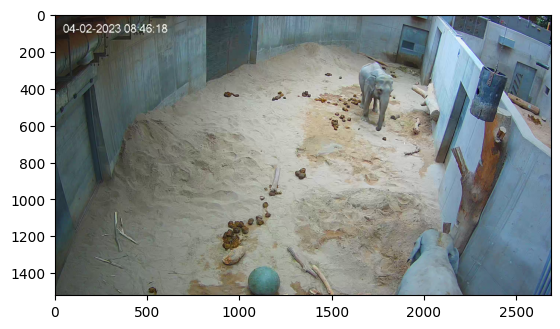

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread("../data/sample_frame.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = im.astype(np.float32) / 255
plt.imshow(im)

In [ ]:
imt = torch.permute(torch.from_numpy(im), [2, 0, 1])
with torch.no_grad():
    predictions = result = model([imt])
assert len(predictions) == 1
predictions = predictions[0]
# x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
# predictions = model(x)  # Returns predictions

In [13]:
display(predictions.keys())
masks = predictions["masks"]
display(predictions["scores"])
display(predictions["boxes"].shape)

dict_keys(['boxes', 'labels', 'scores', 'masks'])

tensor([0.9977, 0.9581, 0.9273, 0.9222, 0.9199, 0.8519, 0.7753, 0.6629, 0.5698,
        0.5554, 0.4927, 0.3859, 0.3679, 0.2926, 0.2724, 0.2507, 0.2397, 0.1929,
        0.1597, 0.0910, 0.0533])

torch.Size([21, 4])

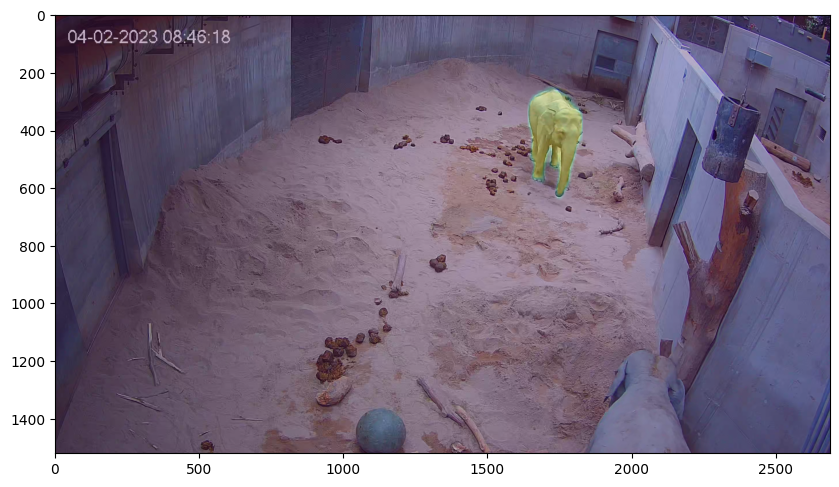

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
ax.imshow(im)
ax.imshow(predictions["masks"][0, 0], alpha=0.3)

In [15]:
# traced_module = torch.jit.trace(model, [[imt]])
traced_module = torch.jit.script(model)
traced_module.save("../models/maskrcnn_trained.ptc")